Libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings

Dataset

In [41]:
dataset = pd.read_csv("heart.csv")
type(dataset)
dataset.shape
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Dataset Lables description

In [42]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]
for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Target Unique values

In [43]:
dataset["target"].describe()
dataset["target"].unique()

array([1, 0])

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


target count

target
1    165
0    138
Name: count, dtype: int64


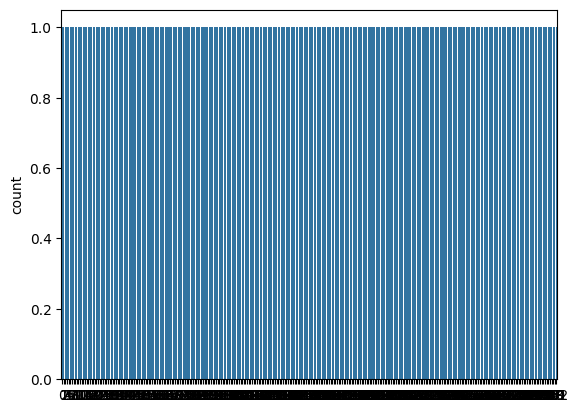

In [44]:
y = dataset["target"]
sns.countplot(y)
target_temp = dataset.target.value_counts()
print(target_temp)

In [45]:
print("Percentage of patience without heart disease: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart disease: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart disease: 45.54
Percentage of patience with heart disease: 54.46


Training, Testing (80, 20)

In [47]:
from sklearn.model_selection import train_test_split
predictors = dataset.drop("target",axis=1)
target = dataset["target"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

Model Neural Networks

Keras for importing data libraries



In [48]:
from keras.models import Sequential
from keras.layers import Dense

In [49]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4425 - loss: 68.2547
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4936 - loss: 54.0788 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4890 - loss: 46.9919 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4304 - loss: 44.2320 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4466 - loss: 35.4196 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4824 - loss: 25.9662 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4629 - loss: 20.3259 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4665 - loss: 14.3388 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4618 - loss: 8.0268 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4317 - loss: 4.5608 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4824 - loss: 3.9734  
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.47

In [51]:
Y_pred_nn = model.predict(X_test)
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Accuracy for Neural Network

In [52]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)
print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 75.41 %


Predicting for heart disease using input values

No Heart Disease

In [ ]:
import numpy as np
def predict_heart_disease(input_data):
    input_array = np.array(input_data).reshape(1, -1)
    prediction = model.predict(input_array)
    prediction_rounded = round(prediction[0][0])
    return "Heart Disease" if prediction_rounded == 1 else "No Heart Disease"
input_features = [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 1, 3]
result = predict_heart_disease(input_features)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
No Heart Disease


Heart Disease

In [54]:
import numpy as np
def predict_heart_disease(input_data):
    input_array = np.array(input_data).reshape(1, -1)
    prediction = model.predict(input_array)
    prediction_rounded = round(prediction[0][0])
    return "Heart Disease" if prediction_rounded == 1 else "No Heart Disease"
input_features = [45, 0, 3, 125, 180, 0, 0, 130, 0, 1.0, 1, 1, 3]
result = predict_heart_disease(input_features)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Heart Disease
